## Análise exploratória utilizando base de dados do COVIDSTRESS Turma: 1TDSA
- **Nome:** Rafael Fernandes Cunha      **RM:** 88687


In [1]:
import pandas as pd #Biblioteca para fazer análises de dados

In [2]:
import warnings
warnings.filterwarnings('ignore')  #Esta biblioteca serve para remover possiveís avisos que o python ou outras bibliotecas podem causar.

In [44]:
import matplotlib.pyplot as plt  # Para trabalhar com gráficos
import seaborn as sns

In [4]:
dados = pd.read_csv('COVIDiSTRESS_June_17.csv', sep=';' ,engine='python') # Estamos carregando o arquivo csv usando o ; como separador e usando a engine do python para conseguir converter o arquivo no formato UTF-8

In [15]:
dados.head(5) #Verificando se os dados foram carregados

,RecordedDate,Dem_age,Dem_gender,Dem_edu,Dem_employment,Country,Dem_state,Dem_maritalstatus,Dem_riskgroup,Dem_islolation,Dem_isolation_adults,Dem_isolation_kids,Scale_PSS10_UCLA_1,Scale_SLON_3,PSS10_avg,SLON3_avg
0,17/06/2020 01:01,48,Female,"College degree, bachelor, master",Full time employed,Netherlands,Zuid-Holland,Married/cohabiting,Yes,Isolated,1.0,0.0,2.0,3.0,2.4,2.666667
1,16/06/2020 23:19,36,Female,"College degree, bachelor, master",Full time employed,Poland,Slaskie,Married/cohabiting,Yes,Life carries on as usual,1.0,2.0,2.0,1.0,1.7,1.000000
2,16/06/2020 22:47,45,Female,"College degree, bachelor, master",Full time employed,Finland,North Karelia,Married/cohabiting,Yes,Life carries on with minor changes,1.0,2.0,2.0,3.0,1.7,2.000000
3,16/06/2020 22:02,35,Female,PhD/Doctorate,Self-employed,Mexico,Estado de Mexico,Married/cohabiting,Yes,Isolated,1.0,2.0,4.0,2.0,2.9,1.333333
4,16/06/2020 21:11,46,Female,"College degree, bachelor, master",Full time employed,Mexico,Ciudad de México,Married/cohabiting,Yes,Isolated,1.0,2.0,3.0,3.0,2.8,2.333333


Análise exploratória
=

In [57]:
dados.isnull().sum() #Verificando se existem dados nulos nas colunas que vamos analisar

RecordedDate                0
Dem_age                     0
Dem_gender                310
Dem_edu                   858
Dem_employment           1152
Country                   558
Dem_state               13634
Dem_maritalstatus        1035
Dem_riskgroup             629
Dem_islolation           1821
Dem_isolation_adults    21551
Dem_isolation_kids      23283
Scale_PSS10_UCLA_1      10216
Scale_SLON_3            10308
PSS10_avg                9356
SLON3_avg                9607
dtype: int64

In [32]:
# Excluindo desse meu conjunto de colunas selecionadas as linhas que tem algum valor nulo
dados_sem_nulo = dados.dropna()

In [55]:
dados_genero_limpo = dados.dropna(subset=['Dem_gender']) #Limpando dados nulos (N/A) na coluna de genero

In [33]:
dados_sem_nulo.info() #verificando como ficou após limpar os valores nulo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83060 entries, 0 to 126400
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RecordedDate          83060 non-null  object 
 1   Dem_age               83060 non-null  int64  
 2   Dem_gender            83060 non-null  object 
 3   Dem_edu               83060 non-null  object 
 4   Dem_employment        83060 non-null  object 
 5   Country               83060 non-null  object 
 6   Dem_state             83060 non-null  object 
 7   Dem_maritalstatus     83060 non-null  object 
 8   Dem_riskgroup         83060 non-null  object 
 9   Dem_islolation        83060 non-null  object 
 10  Dem_isolation_adults  83060 non-null  float64
 11  Dem_isolation_kids    83060 non-null  float64
 12  Scale_PSS10_UCLA_1    83060 non-null  float64
 13  Scale_SLON_3          83060 non-null  float64
 14  PSS10_avg             83060 non-null  float64
 15  SLON3_avg         

Gráfico boxplot entre idade e escala UCLA
=

In [68]:
#configurando o gráfico para deixar mais legível
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20, 8
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Dem_age', ylabel='Scale_PSS10_UCLA_1'>

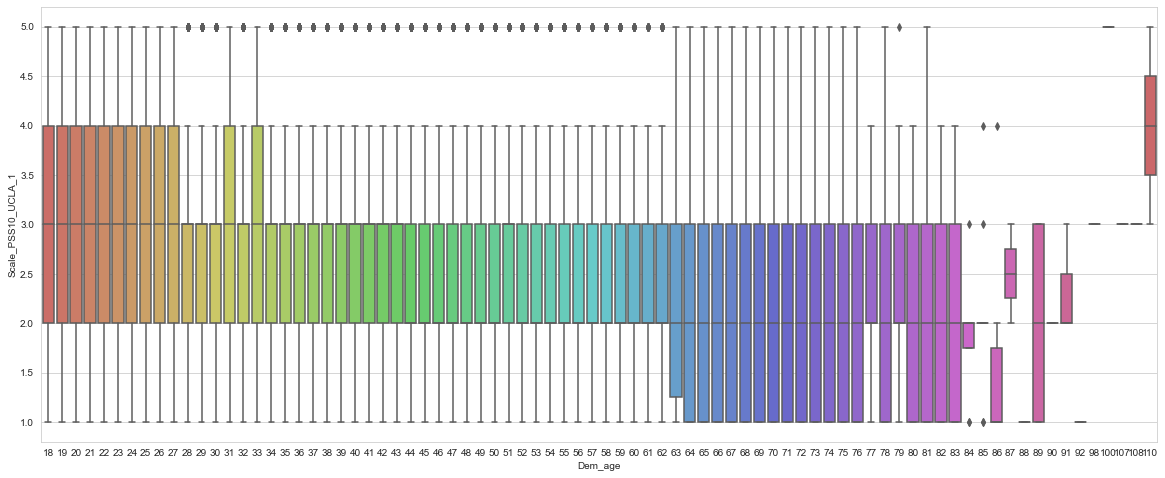

In [62]:
sns.boxplot(x='Dem_age', y='Scale_PSS10_UCLA_1', data=dados_sem_nulo, palette='hls')

<AxesSubplot:xlabel='Dem_age', ylabel='Scale_SLON_3'>

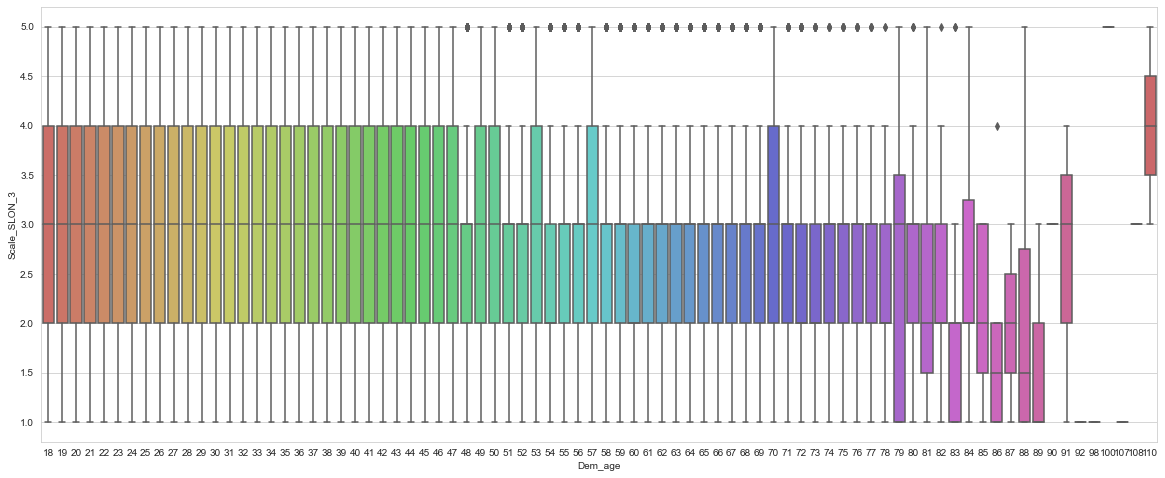

In [65]:
sns.boxplot(x='Dem_age', y='Scale_SLON_3', data=dados_sem_nulo, palette='hls')

Analisando os gráficos acima, conseguimos entender que os jovens foram muitos afetados pela pandemia de acordo com a medição da escala UCLA e SLON.

Gráficos sobre Scale_PSS10_UCLA_1
=

<AxesSubplot:xlabel='Scale_PSS10_UCLA_1', ylabel='Dem_isolation_adults'>

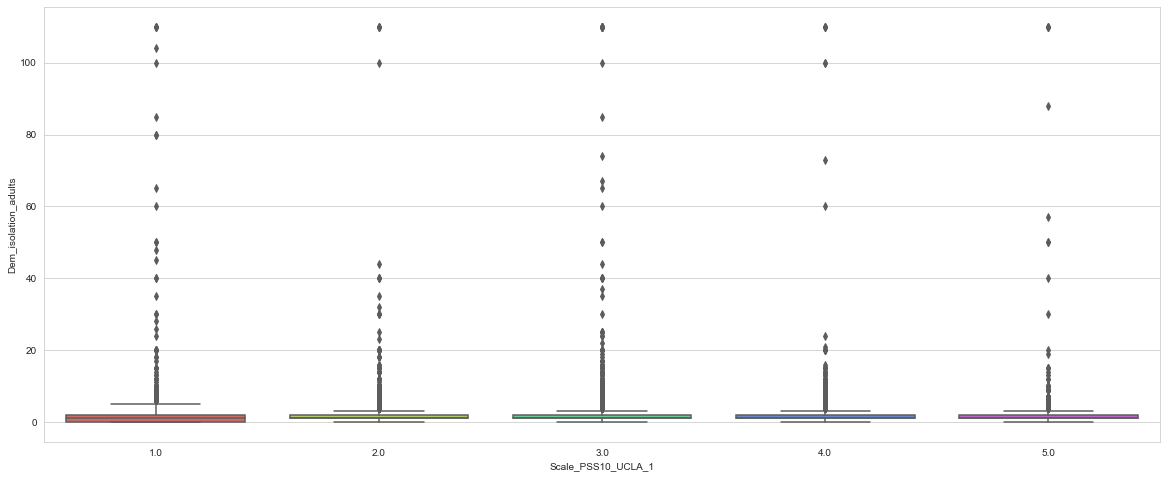

In [69]:
sns.boxplot(x='Scale_PSS10_UCLA_1', y='Dem_isolation_adults', data=dados_sem_nulo, palette='hls')

<AxesSubplot:xlabel='Scale_PSS10_UCLA_1', ylabel='count'>

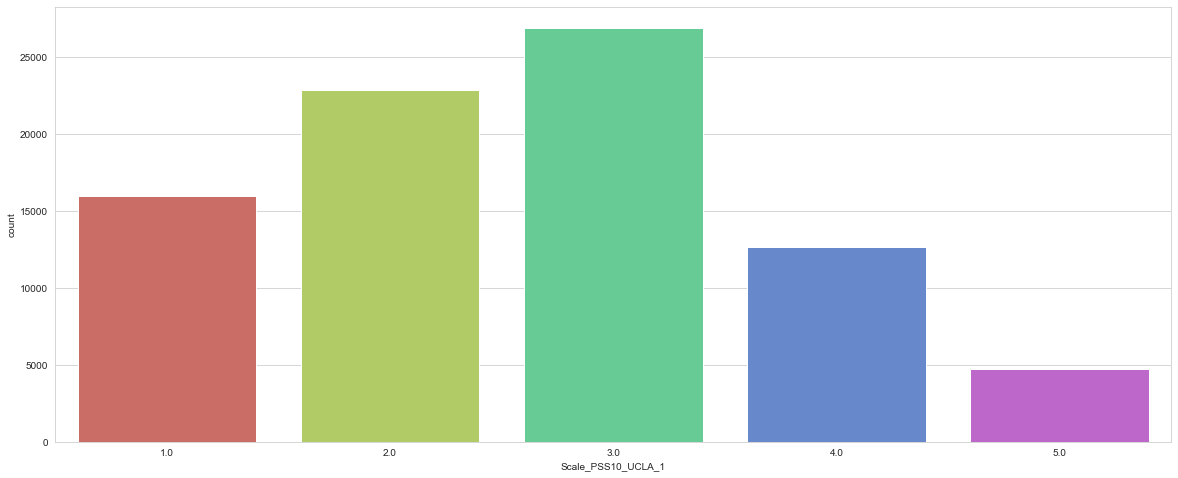

In [71]:
sns.countplot(x='Scale_PSS10_UCLA_1',data=dados_sem_nulo, palette='hls')

Analisando ambos gráficos acima, concluimos que muitas pessoas adultas sentiram um impacto em suas vidas durante a pandemia, pois a média maior da escala é de 3.0. 

Gráfico heatmap 
=

In [78]:
#separando os dados que utilizaremos no gráfico heatmap, onde queremos demonstrar apartir do gênero, idade  e grupo de risco utilizando as escalas de medição UCLA e SLON
Dados_tratados = dados_sem_nulo.drop(['Dem_edu', 'Dem_employment', 'Dem_maritalstatus', 'Dem_islolation', 'PSS10_avg', 'SLON3_avg',  'RecordedDate','Country', 'Dem_state', 'Dem_isolation_kids'], 1)
Dados_tratados.head()

,Dem_age,Dem_gender,Dem_riskgroup,Dem_isolation_adults,Scale_PSS10_UCLA_1,Scale_SLON_3
0,48,Female,Yes,1.0,2.0,3.0
1,36,Female,Yes,1.0,2.0,1.0
2,45,Female,Yes,1.0,2.0,3.0
3,35,Female,Yes,1.0,4.0,2.0
4,46,Female,Yes,1.0,3.0,3.0


<AxesSubplot:>

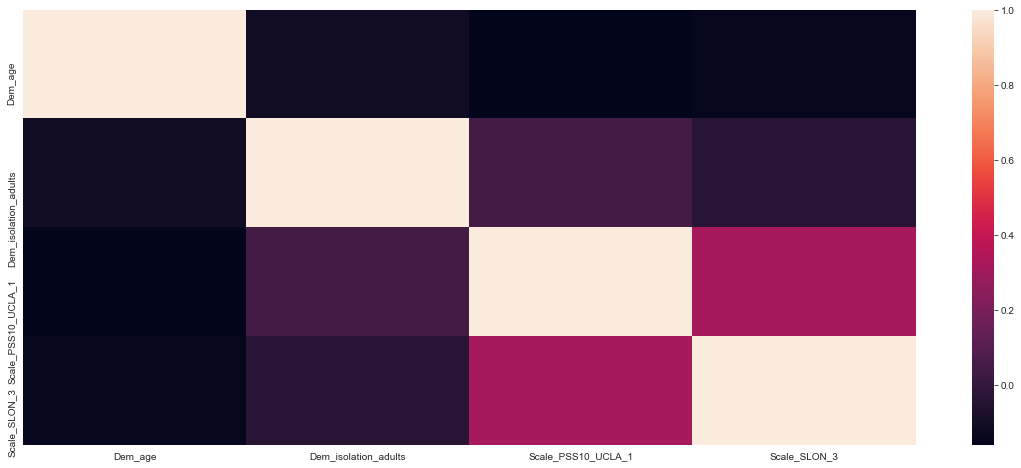

In [79]:
sns.heatmap(Dados_tratados.corr())  

Podemos analisar o gráfico acima, que a idade é um fator muito determinante para se a pessoa foi afetade ou não.

Mostrando que a coluna SLON e PSS são as variáveis que tem mais relação.

Aprendizado de Máquina
=

In [36]:
#Bibliotecas para trabalhar com aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

Nosso objetivo é treinar o algoritmo KNN para ser capaz de distinguir as escalas de stresse e solidão (Scale_SLON_3)

Precisamos escolher algumas variáveis para justificar os valores da escala SLON3, para isso escolheremos as variáveis númericas que fazem ela obter o resultado

In [34]:
# Escolhendo as colunas preditivas e alvo
# Vamos dropar as colunas categóricas que não vamos utilizar para nossa métrica e deixar somente as númericas precisas
x = dados_sem_nulo.drop(columns = ['RecordedDate','Dem_edu', 'Dem_gender','Dem_employment','Country','Dem_state',
                                     'Dem_maritalstatus','SLON3_avg', 'PSS10_avg','Dem_riskgroup','Dem_islolation',])
y = dados_sem_nulo['Scale_SLON_3']         # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste para teste com 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 23)

In [30]:
x_train  #deixamos somentes as numéricas necessárias como podemos vemos

,Dem_age,Dem_isolation_adults,Dem_isolation_kids,Scale_PSS10_UCLA_1,Scale_SLON_3
84322,18,3.0,0.0,3.0,4.0
96209,26,3.0,0.0,5.0,5.0
63223,18,0.0,0.0,2.0,4.0
53817,38,1.0,0.0,3.0,5.0
38391,65,3.0,0.0,3.0,4.0
...,...,...,...,...,...
44277,29,0.0,0.0,3.0,2.0
108189,30,1.0,0.0,3.0,4.0
15554,24,1.0,0.0,1.0,4.0
116496,53,1.0,0.0,2.0,4.0


In [35]:
# Passo 2 - Treinar o Classificador
knn = KNeighborsClassifier(n_neighbors=4) # Criando classificador  com k=4
knn.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 3 - Testar o Classificador
y_predicoes = knn.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99      3835
         2.0       0.98      0.98      0.98      5478
         3.0       0.97      0.99      0.98      7345
         4.0       0.96      0.97      0.96      5271
         5.0       1.00      0.93      0.96      2989

    accuracy                           0.98     24918
   macro avg       0.98      0.97      0.97     24918
weighted avg       0.98      0.98      0.98     24918



Conseguimos uma acurácia de 98% como podemos ver. Vamos demonstrar isso em uma matriz de confusão para deixarmos mais visível.

In [86]:
from sklearn.model_selection import StratifiedKFold

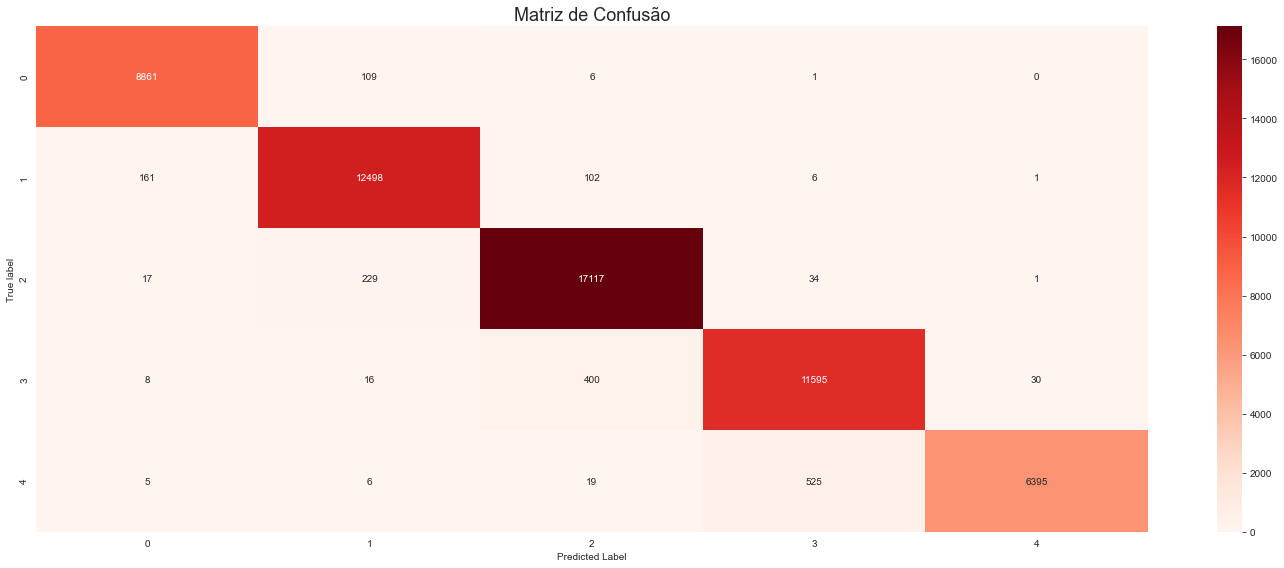

In [85]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = StratifiedKFold(n_splits = 5, shuffle = True)
y_pred = cross_val_predict(KNN_model, x_train, y_train, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

Nesse caso a matriz de confusão deixa bem claro os falsos e positivos, podendo analisar por exemplo quando batemos a escala 1 com 0, temos 161 classificados como 0, mas quando olhamos 1 com 1 vemos um grande número de acertos: 12498